# **Bharath Intern - Machine Learning Internship**

## **Task - Wine Quality Prediction**

Dataset link - https://raw.githubusercontent.com/s-yogeshwaran/Bharat-intern-ml/main/WineQT.csv

In [2]:
import pandas as pd

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/s-yogeshwaran/Bharat-intern-ml/main/WineQT.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.shape

(1143, 13)

In [6]:
df.drop('Id', axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df['quality'].value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

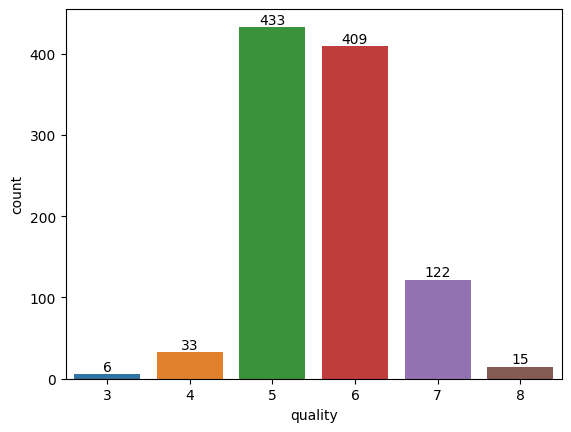

In [14]:
#distribution of quality column
splot = sns.countplot(x = 'quality', data = df)

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.show()

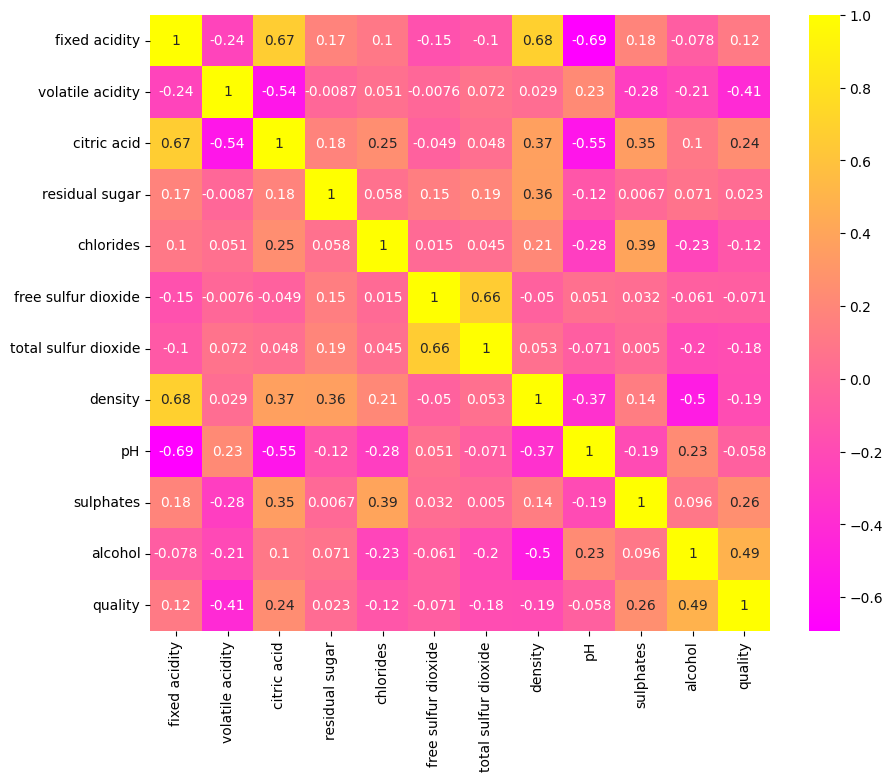

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap= "spring", annot = True)
plt.show()

In [16]:
x = df.drop('quality',axis=1)
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,
                                                    random_state = 42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.60      0.69      0.64       127
           6       0.43      0.59      0.50       116
           7       0.67      0.06      0.11        35
           8       0.00      0.00      0.00        10

    accuracy                           0.52       306
   macro avg       0.28      0.22      0.21       306
weighted avg       0.49      0.52      0.47       306



In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred1 = dt.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.07      0.10        15
           5       0.56      0.56      0.56       127
           6       0.43      0.42      0.43       116
           7       0.30      0.49      0.37        35
           8       0.33      0.10      0.15        10

    accuracy                           0.45       306
   macro avg       0.30      0.27      0.27       306
weighted avg       0.45      0.45      0.45       306





---

